In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
import seaborn as sns # Libreria graficas

In [2]:
#Lee los datos en la tabla
Es= pd.read_excel("respuesta neuronal.xlsx",sheet_name='Sheet 1 - Estímulo Simple', parse_dates=True)
Ec= pd.read_excel("respuesta neuronal.xlsx",sheet_name='Sheet 1 - Estímulo Complejo', parse_dates=True)

In [3]:
#Convierte a una mejor tabla ya que los datos estan desorganizados
Es=Es.drop([0,1])
Es.columns = ['Neurona', '0.25', '0.5', '1', '2', '4']
Es = Es.set_index("Neurona")

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [4]:
#Convierte a una mejor tabla ya que los datos estan desorganizados
Ec=Ec.drop([0,1])
Ec.columns = ['Neurona', '0.25', '0.5', '1', '2', '4']
Ec= Ec.set_index("Neurona")

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [5]:
# convertir los datos ancho a un formato largo con melt
Ec=Ec.reset_index().melt(id_vars='Neurona', var_name='variable', value_name='value')
Ec.columns = ['Neurona', 'Distancia', 'V. estímulo']

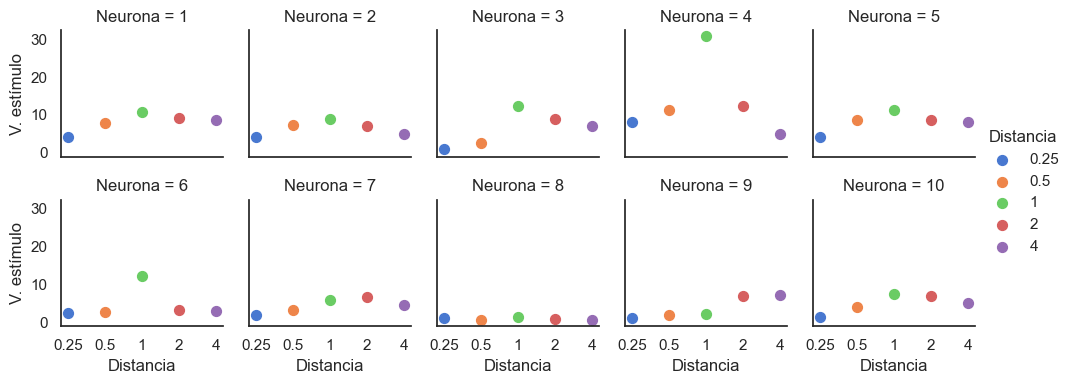

In [6]:
sns.set(style="white")
sns.lmplot(x="Distancia", y="V. estímulo", col="Neurona", hue="Distancia", data=Ec,col_wrap=5, ci=None, palette="muted", height=2,scatter_kws={"s": 50, "alpha": 1});
# g.map(sns.regplot, "x", "y", ci=None, robust=1)
# g.add_legend();

In [7]:
#convierte los parametros de string a float
Ec['Distancia'] = Ec['Distancia'].astype(float)
Ec['V. estímulo'] = Ec['V. estímulo'].astype(float)

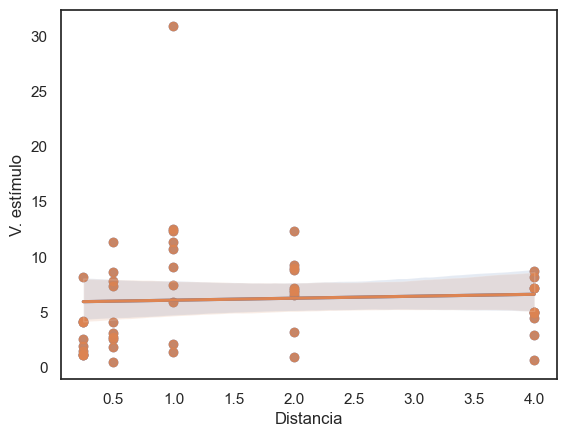

In [10]:
sns.regplot(x="Distancia", y="V. estímulo", data=Ec);
plt.show()

In [9]:
fits = [np.polyfit(g['Distancia'], g['V. estímulo'], 1) for _, g in Ec.groupby('Neurona')] #regresion lineal para cada neurona
# Almacenar los valores calculados de las regresiones lineales en un dataframe
val_reg = pd.DataFrame(fits,columns=['pendiente','intercepto'],index='1 2 3 4 5 6 7 8 9 10'.split())
val_reg.index.names = ['Neurona']
val_reg

,pendiente,intercepto
Neurona,,
1,0.634643,7.129901
2,-0.292457,6.959854
3,1.156989,4.666667
4,-2.337097,17.162500
5,0.353561,7.635724
6,-0.462903,5.437500
7,0.534893,3.551173
8,-0.092197,1.023271
9,1.754301,1.120833


In [1]:
from platform import python_version

print(python_version())

3.9.13
